In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import geopandas
import seaborn as sns



## Énoncé
Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :

Quels sont les pays avec un fort potentiel de clients pour nos services ?
Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
Dans quels pays l'entreprise doit-elle opérer en priorité ?

## Mission
Mark vous a donc demandé de réaliser une analyse pré-exploratoire de ce jeu de données. Il vous a transmis cet email à la suite de la réunion :

Hello,

Les données de la Banque mondiale sont disponibles à l’adresse suivante :

https://datacatalog.worldbank.org/dataset/education-statistics

Ou en téléchargement direct à https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Donn%C3%A9es+%C3%A9ducatives/Projet+Python_Dataset_Edstats_csv.zip

Je te laisse regarder la page d'accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Tu trouveras plus d'info sur ce site :

http://datatopics.worldbank.org/education/

Pour la pré-analyse, pourrais-tu :

Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)
Ton travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. On va partager ton analyse avec le board, alors merci de soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !

## Partie 1 - Inspection des données (10 minutes)

### Présentation du Dataset

Le Dataset est composé de 5 Dataframes
-EdStatsCountry qui repertorie les different pays et zones géographiques, leurs differents noms et codes d'identifications et diférentes informations economiques ou géographiques
-EdStatsSeries qui repertorie les indicateurs et ajoute une decription et des commentaires sur ceux ci.
-EdStatsCountry_Series qui donne les sources de données pour les indicateurs de population.
-EdStats qui donne les sources de données pour differents indicateurs d'éducations.
-EdStatsData Contients les valeurs relevées ou éstimées pour chaque couple (Pays/Zone géographique,Indicateur) pour différentes années.

Pour l'inspection et le traitement des donneés, je me concentrerai principalement sur le Dataframe EdStatsData ainsi que legerement sur le Dataframe EdStatsCountry , les autres n'apportant pas d'informations pertinentes pour répondre a la problématique.


### Inspection 

Dans un premier temps je charge mes deux datasets et je retire toutes les Zones géographiques n'ayant pas de données dans 'Income Group' celle-ci n'étant pas des pays 


In [2]:

country = pd.read_csv("EdStatsCountry.csv",sep=',')
eddata = pd.read_csv("EdStatsData.csv",sep=',')



J'affiche le nombre de lignes et de colonnes du dataframe

In [3]:
eddata.shape

(886930, 70)

In [4]:
eddata.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


J'affiche les colonnes

In [5]:
eddata.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

Je vérifie que toutes mes données dans les colonnes correspondant à une année sont bien de type float64

In [6]:
#La methode sort_value permet de verifier que les colonnes non affiché sont bien de type float64
eddata.dtypes.sort_values()

2000              float64
2003              float64
2004              float64
2005              float64
2006              float64
                   ...   
1992              float64
Indicator Code     object
Indicator Name     object
Country Code       object
Country Name       object
Length: 70, dtype: object

Je vérifie si il y a une duplication ou une donnée manquante pour la clé 'Country Code','Indicator Code'

In [7]:
#Si la somme est zero alors il n'y a pas de valeurs dupliquées
eddata.duplicated(subset=['Country Code','Indicator Code']).sum()


0

In [8]:
#De maniere similaire je verifie qu'il n'y a pas de données manquantes dans le Dataframe
eddata[['Country Code','Indicator Code']].isna().sum()


Country Code      0
Indicator Code    0
dtype: int64

Je regarde le nombre de pays et d'indicateurs présent dans mon Dataset

In [9]:
#le Nombre de ligne de ce tableau donne le nombre de pays et la valeur dans Indicator Name donne
eddata.groupby('Country Code').count()

,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,3665,3665,3665,49,49,49,49,49,49,49,...,308,308,308,308,308,308,308,308,308,0
AFG,3665,3665,3665,523,139,158,236,351,537,164,...,0,0,0,0,0,0,0,0,0,0
AGO,3665,3665,3665,49,95,114,65,55,49,49,...,0,0,0,0,0,0,0,0,0,0
ALB,3665,3665,3665,409,78,74,50,50,410,105,...,308,308,308,308,308,308,308,308,308,0
AND,3665,3665,3665,41,63,63,63,63,99,63,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,3665,3665,3665,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
YEM,3665,3665,3665,410,50,50,50,50,410,50,...,0,0,0,0,0,0,0,0,0,0
ZAF,3665,3665,3665,471,55,55,59,56,419,56,...,308,308,308,308,308,308,308,308,308,0


In [10]:
country = country.dropna(subset=["Income Group"])
eddata=eddata[eddata['Country Code'].isin(country['Country Code'].values)]

# Partie 2 Sélection et analyse des données 

### Sélection des années 

Dans un premier temps je vais choisir les différentes années que je veux étudier.  

Pour cela dans un premier temps à l'aide de la méthode Groupby je créer un DataFrame contenant le taux de donnée manquantes pour chaque couple (Indicateur, Année) 
-Un taux de donnée manquantes de 0.9 correspond à 90% de données manquantes 


In [11]:
#Le tableau crée contient le taux moyen de données manquantes pour chaque indicateurs pr an(Un taux de 0.90 signifie 90% de données manquantes)
tindicateur= eddata.drop('Indicator Code', 1).isna().groupby(eddata['Indicator Code'], sort=False).mean().reset_index().copy()
tindicateur

C:\Users\pon\AppData\Local\Temp\ipykernel_9800\3794585902.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tindicateur= eddata.drop('Indicator Code', 1).isna().groupby(eddata['Indicator Code'], sort=False).mean().reset_index().copy()


,Indicator Code,Country Name,Country Code,Indicator Name,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,UIS.NERA.2,0.0,0.0,0.0,0.981308,0.864486,0.864486,0.883178,0.864486,0.897196,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,UIS.NERA.2.F,0.0,0.0,0.0,0.990654,0.887850,0.883178,0.897196,0.887850,0.906542,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,UIS.NERA.2.GPI,0.0,0.0,0.0,0.990654,0.887850,0.887850,0.897196,0.887850,0.906542,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,UIS.NERA.2.M,0.0,0.0,0.0,0.990654,0.887850,0.887850,0.897196,0.887850,0.906542,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,SE.PRM.TENR,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.LP.AG15T24.M,0.0,0.0,0.0,0.985981,1.000000,1.000000,1.000000,1.000000,0.976636,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3661,SE.ADT.1524.LT.ZS,0.0,0.0,0.0,0.985981,1.000000,1.000000,1.000000,1.000000,0.976636,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3662,SE.ADT.1524.LT.FE.ZS,0.0,0.0,0.0,0.985981,1.000000,1.000000,1.000000,1.000000,0.976636,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3663,SE.ADT.1524.LT.FM.ZS,0.0,0.0,0.0,0.985981,1.000000,1.000000,1.000000,1.000000,0.976636,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


A l'aide d'un autre Grouby j'exprime le taux de données manquantes globale pour chaque année puis je le représente sous forme graphique

In [12]:
#En faisant un groupby selon une colonne ou toutes les valeurs sont identiques j'obtient le taux de données manquantes de chaque années
mannee=tindicateur.groupby('Indicator Name').mean().copy()
mannee=mannee[mannee.loc[:,"2000":"2050"].columns]
mannee





,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050
Indicator Name,,,,,,,,,,,,,,,,,,,,,
0.0,0.785684,0.85365,0.852715,0.844712,0.846706,0.77629,0.832156,0.83619,0.839813,0.83007,...,0.835364,0.980044,0.999818,0.934811,0.934811,0.934811,0.934811,0.934811,0.934811,0.934811


Text(0, 0.5, 'Taux de données manquantes')

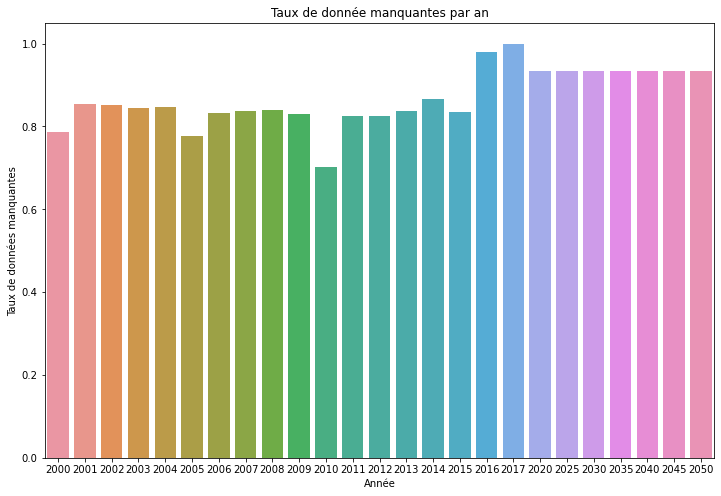

In [13]:

plt.figure(figsize=(12,8))
sns.barplot(data=mannee)
plt.title("Taux de donnée manquantes par an")
plt.xlabel('Année')
plt.ylabel("Taux de données manquantes")




Pour le choix des années à étudier je désire m'orienter vers plusieurs années récentes, consécutives ayant le moins possible de données manquantes. 

Pour cela je divise mes indicateurs en deux catégories : 

-Les indicateurs de relevé pour lesquels je choisi d'étudier les année de 2010 à 2013, les années précédentes étant trop vielles et l'année 2014 ayant trop d'indicateur manquants 

-Les indicateurs de projection pour lesquels je choisi d'étudier les années 2020,2025 et 2030, les années précédentes n'ayant pas de donnée pour ces indicateurs 

### Sélection des indicateurs 

Pour sélectionner mes indicateurs je vais d'abord fixer un nombre de donnée manquantes maximum me permettant de ressortir une liste d'indicateurs pertinents pouvant être trié manuellement. 

Pour cela je crée deux dataframe regroupant par taux de donnée les indicateurs de projection et de relevé 

In [14]:
#La premiere ligne fait la moyenne du taux de donnée manquantes sur les années voulu, la deuxieme créer des intervalles et compte le nombre d'indacteurs appartenant a chacun
tindicateur['Nombre Releve']=tindicateur[["2010","2011","2012","2013"]].mean(axis=1)
mreleve=tindicateur.groupby(pd.cut(tindicateur["Nombre Releve"], np.arange(0,1.1, 0.1))).count().copy()
mreleve

,Indicator Code,Country Name,Country Code,Indicator Name,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Nombre Releve
Nombre Releve,,,,,,,,,,,,,,,,,,,,,
"(0.0, 0.1]",38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
"(0.1, 0.2]",214,214,214,214,214,214,214,214,214,214,...,214,214,214,214,214,214,214,214,214,214
"(0.2, 0.3]",44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
"(0.3, 0.4]",118,118,118,118,118,118,118,118,118,118,...,118,118,118,118,118,118,118,118,118,118
"(0.4, 0.5]",122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122
"(0.5, 0.6]",181,181,181,181,181,181,181,181,181,181,...,181,181,181,181,181,181,181,181,181,181
"(0.6, 0.7]",172,172,172,172,172,172,172,172,172,172,...,172,172,172,172,172,172,172,172,172,172
"(0.7, 0.8]",135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135
"(0.8, 0.9]",786,786,786,786,786,786,786,786,786,786,...,786,786,786,786,786,786,786,786,786,786


In [15]:
#Pareil que la cellule précédente
tindicateur['Nombre Projection']=tindicateur[["2030","2035","2040"]].mean(axis=1)
mprojection=tindicateur.groupby(pd.cut(tindicateur['Nombre Projection'], np.arange(0,1.1, 0.1))).count().copy()
mprojection

,Indicator Code,Country Name,Country Code,Indicator Name,1970,1971,1972,1973,1974,1975,...,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Nombre Releve,Nombre Projection
Nombre Projection,,,,,,,,,,,,,,,,,,,,,
"(0.0, 0.1]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(0.1, 0.2]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(0.2, 0.3]",308,308,308,308,308,308,308,308,308,308,...,308,308,308,308,308,308,308,308,308,308
"(0.3, 0.4]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(0.4, 0.5]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(0.5, 0.6]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(0.6, 0.7]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(0.7, 0.8]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(0.8, 0.9]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


([<matplotlib.axis.XTick at 0x19eb2d957e0>,
 [Text(0, 0, '(0.0, 0.1]'),
  Text(1, 0, '(0.1, 0.2]'),
  Text(2, 0, '(0.2, 0.3]'),
  Text(3, 0, '(0.3, 0.4]'),
  Text(4, 0, '(0.4, 0.5]'),
  Text(5, 0, '(0.5, 0.6]'),
  Text(6, 0, '(0.6, 0.7]'),
  Text(7, 0, '(0.7, 0.8]'),
  Text(8, 0, '(0.8, 0.9]'),
  Text(9, 0, '(0.9, 1.0]')])

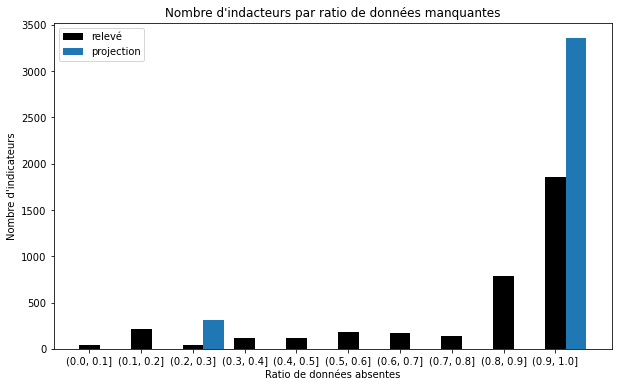

In [16]:
index=mreleve.index.astype(str)
w=0.4
bar1=np.arange(len(mreleve.index))
bar2=[i+w for i in bar1]
plt.figure(figsize=(10,6))
plt.bar(bar1,mreleve['Nombre Releve'],w,color='black',label='relevé')
plt.bar(bar2,mprojection['Nombre Projection'],w,label='projection')
plt.title("Nombre d'indacteurs par ratio de données manquantes")
plt.xlabel('Ratio de données absentes')
plt.ylabel("Nombre d'indicateurs")
plt.legend()
plt.xticks(bar1,index)


Je choisi de garder les indicateurs ayant au moins 60% de données présente, cela me permet de garder environ 400 indicateurs de relevé et toute la tranche des indicateurs de projections ce qui est une base de données convenable pour trie manuellement les indicateurs.


In [17]:
#Les lignes gardes les indicateurs avec au moins 60% de données presentes.
indicateur_releve = tindicateur['Indicator Code'][tindicateur['Nombre Releve'] < 0.4]
indicateur_projection = tindicateur['Indicator Code'][tindicateur['Nombre Projection'] < 0.4]
eddata=eddata[eddata['Indicator Code'].isin(indicateur_projection.append(indicateur_releve))]

C:\Users\pon\AppData\Local\Temp\ipykernel_9800\1468529609.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eddata=eddata[eddata['Indicator Code'].isin(indicateur_projection.append(indicateur_releve))]


Je vais maintenant trier manuellement les indicateurs dans mes deux dataframes et les exprimer en population

Je sélectionne parmi les indicateurs de relevé restant ceux que je veux étudier, pour cela je retire les indicateurs : 
- Portant sur un degrés d'éducation plus bas que le upper secondary 
- Spécifique à un sexe 
- Ayant une redondance avec d'autre indicateurs (ex : Données en pourcentage de population globale et en Nombre de personnes) 

Ensuite je retire manuellement parmi les indicateurs restants ceux qui ne me semble pas pertinent pour la problématique 
Ex : Age requis pour entrer dans le upper secondary 




    

In [18]:
#Creation d'une fonction qui retire une serie d'indicateurs d'un dataframe
def remove(df,strg):
    for item in strg:
        df=df[(df["Indicator Code"].str.contains(item,regex=False))==False]
    return df

In [19]:
#Les lignes suivantes servait a afficher la totalité du dataframe et sont desactivé pour faciliter la lisibilité
#pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_colwidth', None)


liste_releve= eddata[eddata['Indicator Code'].isin(indicateur_releve).values].copy()
strg=['UIS.E.3.','GDP','PRE','PRM','G1','G2','G3','G4',"G5",'.1','.2','.0','.F','.M','DUR','GDP','ENRR','GC','VO','GPI','TOTL.IN','SAP']
liste_releve=remove(liste_releve,strg)
liste_releve=remove(liste_releve,['UIS.PRP.3','UIS.THAGE.4.A.GPV','UIS.TE_100000.56','UIS.E.3.V','UIS.E.3.GPV','UIS.GOER.56','UIS.GTVP.3.V','UIS.OMR.56','SE.SEC.ENRL','NY.GNP.PCAP.CD','SL.TLF.TOTL.IN','SE.SEC.AGES','UIS.THAGE.3.A.GPV','SP.SEC.LTOT.IN','SH.DYN.AIDS.ZS','SL.UEM.TOTL.ZS','UIS.GTVP.3.GPV','P.SEC.UTOT.IN','UIS.SLE.56','SP.POP.GROW','SP.POP.AG'])
liste_releve[['Indicator Name','Indicator Code']][liste_releve.duplicated('Indicator Code', keep='first') == False]



,Indicator Name,Indicator Code
92829,"Enrolment in tertiary education, all programme...",SE.TER.ENRL
92839,"Enrolment in upper secondary education, both s...",UIS.E.3
92877,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD
93000,Internet users (per 100 people),IT.NET.USER.P2
93481,Percentage of enrolment in secondary education...,SE.SEC.PRIV.ZS
94158,"Population, total",SP.POP.TOTL
94723,Total outbound internationally mobile tertiary...,UIS.OE.56.40510


Les indicateurs que je juge les plus important pour notre mission sont 

- 'Enrolment in tertiary education, all programmes, both sexes (number)' et 'Enrolment in upper secondary education, both sexes (number)' : qui nous permettent d'évaluer le nombre de personne pouvant prétendre aux formations proposées 

- 'Internet users (per 100 people)' : La formation étant en ligne, il est nécessaire que les clients soient des utilisateurs d'internet 

- GNI per capita, PPP (current international $) : Qui nous permet de cibler des pays ou la population moyenne peut investir dans une éducation privée 
  
Les deux autres indicateurs nous donnent des informations complémentaires sur la relation avec d'autre organisme d'éducation international ou privés au sein des pays 

Pour chaque pays je multiplie par la population du pays , les valeurs des indicateurs :
- Internet users (per 100 people)
- Percentage of enrolment in secondary education in private institutions (%)



In [20]:

for item in country['Country Code'].values:
    dfs=liste_releve[liste_releve['Country Code'].str.contains(item,regex=False)==True]
    pop=dfs[dfs['Indicator Code']=='SP.POP.TOTL'].index
    internet=dfs[dfs['Indicator Code']=='IT.NET.USER.P2'].index
    private=dfs[dfs['Indicator Code']=='SE.SEC.PRIV.ZS'].index
    for dates in ['2010',"2011","2012","2013"]:        
        liste_releve.loc[internet,[dates]]=liste_releve.loc[internet,[dates]].values*liste_releve.loc[pop,[dates]].values/100
        liste_releve.loc[private,[dates]]=liste_releve.loc[private,[dates]].values*liste_releve.loc[pop,[dates]].values/100
        

liste_releve=remove(liste_releve,['SP.POP.TOT'])  

      

Dans le second Dataframe je retire seulement les indicateurs :  
- Portant sur un degrés d'éducation plus bas que le upper secondary 
- Spécifique a un sexe 
- Ayant une redondance avec d'autre indicateurs (ex : Données en pourcentage de population globale et en Nombre de personnes) a l'exception de deux. 
- Wittgenstein Projection: Mean years of schooling 

  

Je fais ensuite un choix parmi les tranches de population à garder : 
- 15-19 ans 
- 20-39 ans 
- 40-64 ans 

  

J'ai choisi cette tranche afin d'obtenir des données sur l'ensemble de la population active et donc susceptible d'être des clients 
En revanche les trois catégories n'ont pas le même poids  
- La tranche des 15-19 ans qui possèdent un niveau d'éducation post secondary compte beaucoup moins d'individus que les autres 
- La tranche des 40-64 ans est moins susceptible de suivre un cursus de formation ou de réorientation, notamment en ligne 





In [21]:
#pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_colwidth', None)
liste_projection= eddata[eddata['Indicator Code'].isin(indicateur_projection).values].copy()
strg=[".2.",".1.","S1","NED","MYS"]
liste_projection=remove(liste_projection,strg)
liste_projection=liste_projection[(liste_projection["Indicator Code"].str.contains(".MF",regex=False))==True]
liste_projection=liste_projection[(liste_projection["Indicator Code"].str.contains("1519|2039|4064"))==True]

liste_projection[['Indicator Name','Indicator Code']][liste_projection.duplicated('Indicator Code', keep='first') == False]




,Indicator Name,Indicator Code
95041,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.1519.4.MF
95047,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.1519.3.MF
95077,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2039.4.MF
95083,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2039.3.MF
95149,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.4064.4.MF
95155,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.4064.3.MF
95221,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.4.MF
95227,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF


Je vais maintenant convertir en population toute les données exprimées en pourcentage  
A l'aide des indicateurs 
- PRJ.POP.1519.3.MF 
- PRJ.ATT.1519.3.MF 
Qui expriment la même donnée en dizaine de millier de personne et en pourcentage, 
Je peux estimer la valeur d'1% de la population totale d'un pays par l'opération PRJ.ATT.1519.3.MF(pays) / PRJ.POP.1519.3.MF(pays) *1000 

Je multiplie ensuite toutes les données du pays par ce nombre. Puis je retire les indicateurs qui ne me sont plus utiles 


In [22]:
           
for item in country['Country Code'].values:
    dfs=liste_projection[liste_projection['Country Code'].str.contains(item,regex=False)==True]
    for dates in ['2020','2025','2030']:
        if( dfs[dfs['Indicator Code']=='PRJ.ATT.1519.3.MF'][dates].values[0]!=0):
            pop=(dfs[dfs['Indicator Code']=='PRJ.POP.1519.3.MF'][dates].values)/(dfs[dfs['Indicator Code']=='PRJ.ATT.1519.3.MF'][dates].values)
            pop*=1000
        else:
            pop=0
        for indic in dfs[['Indicator Code']][dfs.duplicated('Indicator Code', keep='first') == False].index:
            liste_projection.loc[indic,[dates]]*=pop  
liste_projection=remove(liste_projection,['PRJ.POP.1519.4.MF','PRJ.POP.1519.3.MF'])
            

            

        

        





        














    

## Analyse des données


Je crée une colonne moyenne dans chaque Dataframe correspondant à la moyenne de la ligne pour les années étudiées puis à l'aide de la méthode grouby j'exprime les valeurs statistiques basique de chaque indicateur 

In [23]:
#Je creer deux tableau contenant les valeurs statistiques pour chaque année

liste_releve['moyenne']=liste_releve[['2010',"2011","2012","2013"]].mean(skipna=True,axis=1)
stat=liste_releve.groupby('Indicator Code').describe().copy()
stat=stat['moyenne']
print(stat)

liste_projection['moyenne']=liste_projection[['2020',"2025","2030"]].mean(skipna=True,axis=1)
statp=liste_projection.groupby('Indicator Code').describe().copy()
statp=statp['moyenne']
print(statp)







                   count          mean           std          min  \
Indicator Code                                                      
IT.NET.USER.P2     203.0  1.124930e+07  4.409371e+07     0.000000   
NY.GNP.PCAP.PP.CD  188.0  1.726027e+04  1.948933e+04   610.000000   
SE.SEC.PRIV.ZS     159.0  9.724233e+06  5.174780e+07  1236.318475   
SE.TER.ENRL        167.0  1.117248e+06  3.684703e+06     5.000000   
UIS.E.3            177.0  1.326859e+06  5.352900e+06  1150.000000   
UIS.OE.56.40510    195.0  1.762038e+04  5.095085e+04   176.000000   

                             25%           50%           75%           max  
Indicator Code                                                              
IT.NET.USER.P2     224541.987900  1.416632e+06  5.634688e+06  5.416651e+08  
NY.GNP.PCAP.PP.CD    3723.125000  1.019000e+04  2.234562e+04  1.171675e+05  
SE.SEC.PRIV.ZS      79107.906371  7.583861e+05  2.922957e+06  6.136418e+08  
SE.TER.ENRL         38228.125000  1.939292e+05  5.929765e+05  

Je vais maintenant attribuer un score à chacun de mes pays 
Pour cela je vérifie pour chaque indicateur d'un pays s'il se trouve dans le premier quartile 
Cela permet d'afficher facilement les "meilleurs" pays en revanche cela peut sous-estimer des pays se trouvant dans le deuxième quartile pour un indicateurs.   

Apres j'ajoute 10 points pour chaque indicateurs principal et 1 point pour chaque indicateur secondaire. 

Cela me permet de premier de trier mes pays en priorité selon les indicateurs principaux tout en gardant l'information des secondaire



        

       

In [24]:

best=['IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','UIS.E.3','SE.TER.ENRL','PRJ.ATT.1519.3.MF','PRJ.ATT.2039.3.MF','PRJ.ATT.2039.4.MF']

testa=np.zeros(len(country))
num_pays=0
np.set_printoptions(threshold=sys.maxsize)

for item in country['Country Code']:
    for indi in liste_releve[liste_releve['Country Code'].str.contains(item,regex=False)].index:
        if (liste_releve['moyenne'][indi] > stat['75%'][liste_releve['Indicator Code'][indi]]):
            if liste_releve['Indicator Code'].isin(best)[indi]==True:
                testa[num_pays]+=10
            else:
                testa[num_pays]+=1
            
    num_pays+=1

num_pays=0
for item in country['Country Code']:
    for indi in liste_projection[liste_projection['Country Code'].str.contains(item,regex=False)].index:
        if (liste_projection['moyenne'][indi] > statp['75%'][liste_projection['Indicator Code'][indi]]):
            if liste_projection['Indicator Code'].isin(best)[indi]==True:
                testa[num_pays]+=10
            else:
                testa[num_pays]+=1
    num_pays+=1
    
    
country['Score']=testa
country.sort_values('Score',ascending=False,inplace=True)
country[['Short Name','Score']]

country[['Short Name','Region','Score']].sort_values('Score',ascending=False).head(30)




        
    

,Short Name,Region,Score
71,France,Europe & Central Asia,75.0
227,United States,North America,75.0
114,Korea,East Asia & Pacific,74.0
107,Japan,East Asia & Pacific,74.0
104,Italy,Europe & Central Asia,74.0
75,United Kingdom,Europe & Central Asia,74.0
65,Spain,Europe & Central Asia,74.0
176,Poland,Europe & Central Asia,73.0
185,Russia,Europe & Central Asia,73.0
188,Saudi Arabia,Middle East & North Africa,73.0


Afin de pouvoir visualiser la répartition des scores sur la planète 
- Je crée un Barplot des 30 pays avec le meilleur score 
- Je crée un tableau contenant les valeurs statistiques du score pour chaque zone géographique puis je le représente graphiquement sous forme de boxplot. 
- Je crée une Carte Choroplèthe représentant les scores 

Text(0.5, 1.0, 'Trente pays ayant obtenue le meilleur score')

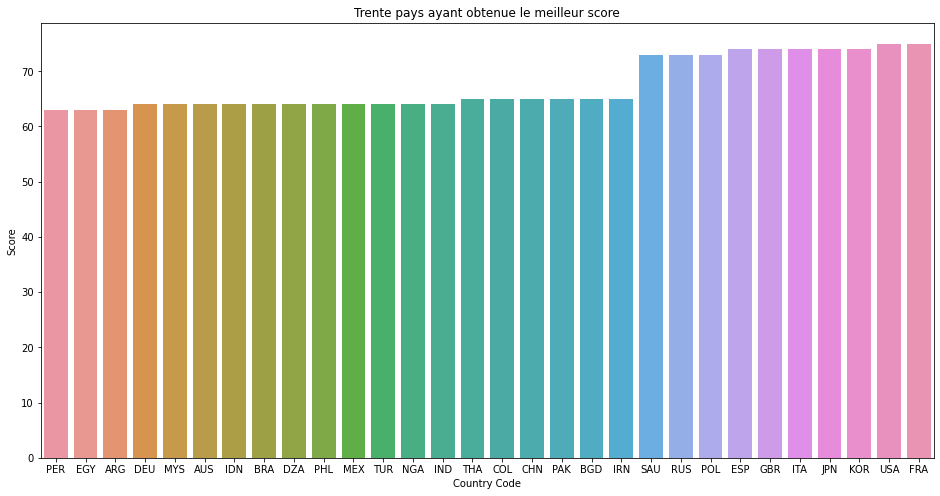

In [25]:
plt.figure(figsize=(16,8))
sns.barplot(x='Country Code',y='Score',data=country[['Country Code','Score']].sort_values('Score',ascending=False).head(30).sort_values('Score',ascending=True)
).set_title('Trente pays ayant obtenue le meilleur score')

In [26]:
country.groupby('Region').describe()['Score']

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,36.0,19.055556,27.906931,0.0,0.0,0.5,37.25,74.0
Europe & Central Asia,57.0,18.508772,25.143959,0.0,0.0,10.0,21.00,75.0
Latin America & Caribbean,41.0,11.048780,22.539910,0.0,0.0,0.0,1.00,65.0
Middle East & North Africa,21.0,20.809524,24.440988,0.0,1.0,10.0,22.00,73.0
North America,3.0,46.333333,33.171273,10.0,32.0,54.0,64.50,75.0
South Asia,8.0,30.750000,29.774150,0.0,7.5,21.0,64.25,65.0
Sub-Saharan Africa,48.0,6.229167,14.838477,0.0,0.0,0.0,1.00,64.0


Text(0.5, 1.0, 'Repartition du score dans le différentes zones geographiques')

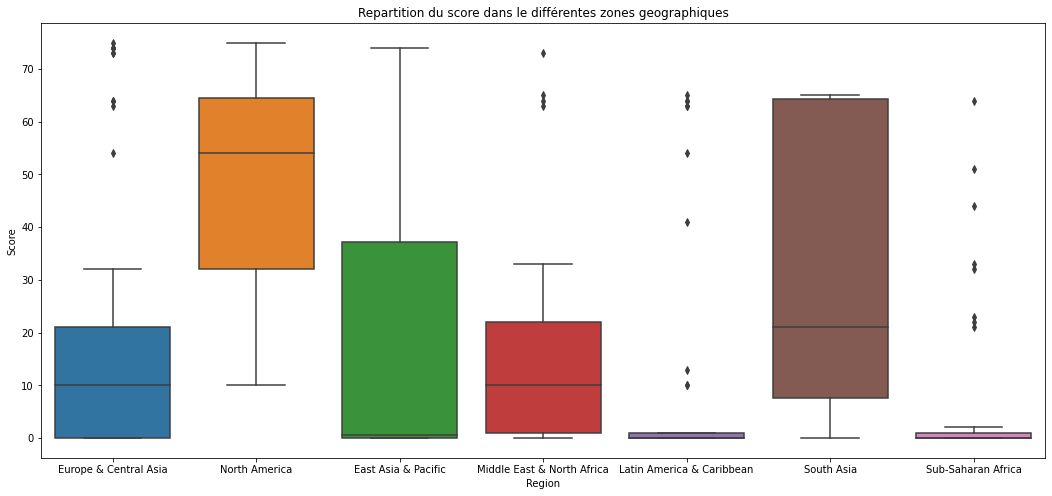

In [27]:
fig, ax = plt.subplots(1, 1,figsize=(18,8))
sns.boxplot(x='Region',y='Score',data=country).set_title('Repartition du score dans le différentes zones geographiques')



On peut remarquer une grande disparité des scores au sein de chaque zone géographique, cependant ces résultats nous orientent vers deux zones géographiques 
- L'Amérique du nord qui possède les valeurs les plus hautes pour chaque indicateur statistique 
- L'Europe et l'Asie centrale qui possède le plus de pays ayant un score supérieur à 70 mais dont les valeurs statistiques faibles peuvent s'expliquer par la présence de nombreux pays, notamment de petites tailles 


Text(0.5, 1.0, 'Repartition du score dans le monde')

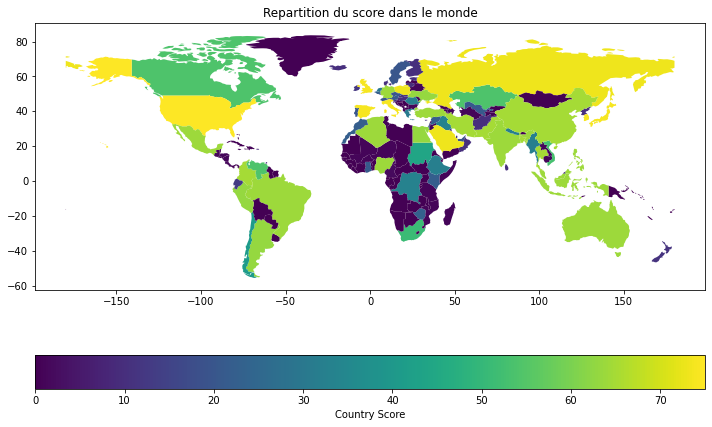

In [28]:
#jmporte le fichier parmettant la creation d'une map et merge les pays avec leurs scores
world=geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world=world.merge(country[['Country Code','Score']],left_on='iso_a3', right_on='Country Code')


world.plot(column='Score', legend=True ,legend_kwds={'label': "Country Score",
                        'orientation': "horizontal"},figsize=(12,8)).set_title('Repartition du score dans le monde')




Cette carte nous permet de compléter les résultats précèdent en remarquant que la majorité des pays développé d'Europe sont situé en Europe de l'Ouest ; et à mettre en évidence la concentration de pays ayant un haut score en Asie de l'Est, est lié au découpage en zones de ce continent .

# Partie 3 Résultats  

Les pays les plus susceptibles de répondre à la problématique sont les pays ayant un score supérieur à 70. 

Bien que la région européenne ait de faibles valeurs statistiques, probablement dû à un grand nombre de petits pays, elle possède une concentration de pays avec un score supérieur à 70, et une proximité géographique et culturelle avec la France, c'est pour cela que ma principale suggestion s'oriente vers ces pays européens : 

- Italie 
- Espagne 
- Pologne 
- Russie 
- Royaume Uni 

Puis dans un deuxième temps : 
- Les Etats Unis : qui possèdent un score de 75 et qui se situe dans une zone géographique avec des indicateurs statistiques élevé qui pourrait une future expansion, ainsi qu'une proximité linguistique. 
- Le Japon et la Corée qui possèdent une note élevée et qui se trouve dans une zone géographique ou sont concentré plusieurs pays avec un score élevé. 










    
    